In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from math import pi

data1=pd.read_csv("Book1.csv")  
data1.head()
 



,Z numbers for the fuzzy rates,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,A (restriction component),NaN,NaN,NaN,NaN,B (reliability component),NaN,NaN,NaN
1,Linguistic Variable,TrFNs,NaN,NaN,NaN,Linguistic Variable,TrFNs,NaN,NaN
2,Very Poor (VP),0,0.0,1.0,2.0,Vey Low (VL),0,0.0,0.1
3,Poor (P),1,2.0,2.0,3.0,Low (L),0,0.1,0.3
4,Medium Poor (MP),2,3.0,4.0,5.0,Medium Low (ML),0.1,0.3,0.5


In [6]:
data2=pd.read_csv("Book2.csv")
data2=data2.astype('category')
data2.head()





,Unnamed: 0,S,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,O,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,D,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,DM1,NaN,DM2,NaN,DM3,NaN,DM1,NaN,DM2,NaN,DM3,NaN,DM1,NaN,DM2,NaN,DM3,NaN
1,NaN,A,R,A,R,A,R,A,R,A,R,A,R,A,R,A,R,A,R
2,H1,G,H,VP,L,G,H,G,MH,P,H,M,H,G,M,VG,H,G,H
3,H2,M,M,VP,L,MG,H,M,M,P,M,MP,H,M,M,G,H,G,H
4,H3,VG,H,G,M,G,H,G,H,G,M,P,H,G,H,VG,H,G,H


In [7]:
#Convert 4 values into 7 values
def Converting_into_7values(values):
     
    list=[]
    n=len(values)
    for i in range(n-1):
        a=(float(values[i])+values[i+1])/2
        list.append(float(values[i]))
        list.append(a)
    list.append(values[n-1])
    return list
#Sample test
 

#matrix=np.array[7,8]
dataframe=[]
for i in range(7):
    dataframe.append(Converting_into_7values(np.array(data1.iloc[i+2,1:5])))
    
dataset=pd.DataFrame(dataframe)
 
dataset.rename(index={0:'VP',1:'P',2:'MP',3:'M',4:'MG',5:'G',6:'VG'},inplace=True)
dataset.head()

,0,1,2,3,4,5,6
VP,0.0,0.0,0.0,0.5,1.0,1.5,2.0
P,1.0,1.5,2.0,2.0,2.0,2.5,3.0
MP,2.0,2.5,3.0,3.5,4.0,4.5,5.0
M,4.0,4.5,5.0,5.0,5.0,6.5,8.0
MG,5.0,5.5,6.0,6.5,7.0,7.5,8.0


In [8]:
def conversion_to_crisp(fuzzy_set):
     
    Crisp_value= np.mean(fuzzy_set,dtype=np.float64)
    return Crisp_value
Crisp_values=np.ones(7)
for i in range(7):
    Crisp_values[i]=conversion_to_crisp(np.array(data1.iloc[i+2,6:]))
 
print(Crisp_values)

membership_values=np.array([0,0.33,0.667,1,0.667,0.33,0])
print(membership_values)

[ 0.03333333  0.13333333  0.3         0.5         0.7         0.86666667
  0.96666667]
[ 0.     0.33   0.667  1.     0.667  0.33   0.   ]


In [9]:
#Corresponding probability(p-values) of these reliability(M)
#By using lingo with the linear equations 
p_values= pd.read_csv("Book3.csv")
p_values.head()

,Unnamed: 0,P1,P2,P3,P4,P5,P6,P7
0,VL,0.453428,0.042700,0.003830,0.000021,0.003830,0.042700,0.453428
1,L,0.346087,0.112478,0.035700,0.011500,0.035700,0.112478,0.346087
2,ML,0.217243,0.148261,0.100366,0.068300,0.100366,0.148261,0.217243
3,M,0.107931,0.131760,0.161532,0.197554,0.161532,0.131760,0.107931
4,MH,0.036000,0.080100,0.181103,0.405545,0.181103,0.080100,0.036000


In [10]:
data3=pd.read_csv("Book2 - Copy.csv")
question=data3.iloc[2:,1::2]
question.head()

,S,Unnamed: 3,Unnamed: 5,O,Unnamed: 9,Unnamed: 11,D,Unnamed: 15,Unnamed: 17
2,"7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","0.0, 0.0, 0.0, 0.5, 1.0, 1.5, 2.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","1.0, 1.5, 2.0, 2.0, 2.0, 2.5, 3.0","4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","8.0, 8.5, 9.0, 9.5, 10.0, 10.0, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0"
3,"4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","0.0, 0.0, 0.0, 0.5, 1.0, 1.5, 2.0","5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0","4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","1.0, 1.5, 2.0, 2.0, 2.0, 2.5, 3.0","2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0","4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0"
4,"8.0, 8.5, 9.0, 9.5, 10.0, 10.0, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","1.0, 1.5, 2.0, 2.0, 2.0, 2.5, 3.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","8.0, 8.5, 9.0, 9.5, 10.0, 10.0, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0"
5,"4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","0.0, 0.0, 0.0, 0.5, 1.0, 1.5, 2.0","8.0, 8.5, 9.0, 9.5, 10.0, 10.0, 10.0","4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","1.0, 1.5, 2.0, 2.0, 2.0, 2.5, 3.0","1.0, 1.5, 2.0, 2.0, 2.0, 2.5, 3.0","4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","8.0, 8.5, 9.0, 9.5, 10.0, 10.0, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0"
6,"5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0","4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","8.0, 8.5, 9.0, 9.5, 10.0, 10.0, 10.0","4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","1.0, 1.5, 2.0, 2.0, 2.0, 2.5, 3.0","1.0, 1.5, 2.0, 2.0, 2.0, 2.5, 3.0","4.0, 4.5, 5.0, 5.0, 5.0, 6.5, 8.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0"


In [11]:
reliability=data3.iloc[2:,2::2]
reliability.head()
 

,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 14,Unnamed: 16,Unnamed: 18
2,"0.005160, 0.025800, 0.132877, 0.672417, 0....","0.346087, 0.112478, 0.035700, 0.011500, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.036000, 0.080100, 0.181103, 0.405545, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.107931, 0.131760, 0.161532, 0.197554, 0...","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0...."
3,"0.107931, 0.131760, 0.161532, 0.197554, 0....","0.346087, 0.112478, 0.035700, 0.011500, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.107931, 0.131760, 0.161532, 0.197554, 0....","0.107931, 0.131760, 0.161532, 0.197554, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.107931, 0.131760, 0.161532, 0.197554, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0...."
4,"0.005160, 0.025800, 0.132877, 0.672417, 0....","0.107931, 0.131760, 0.161532, 0.197554, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.107931, 0.131760, 0.161532, 0.197554, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0...."
5,"0.107931, 0.131760, 0.161532, 0.197554, 0....","0.217243, 0.148261, 0.100366, 0.068300, 0....","0.000113, 0.002190, 0.045300, 0.904781, 0....","0.107931, 0.131760, 0.161532, 0.197554, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.107931, 0.131760, 0.161532, 0.197554, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0...."
6,"0.036000, 0.080100, 0.181103, 0.405545, 0....","0.217243, 0.148261, 0.100366, 0.068300, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.036000, 0.080100, 0.181103, 0.405545, 0....","0.036000, 0.080100, 0.181103, 0.405545, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.036000, 0.080100, 0.181103, 0.405545, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0....","0.005160, 0.025800, 0.132877, 0.672417, 0...."


# Creating IMF

In [12]:
list=[]
 
for i in range(13):
    list_rows=[]
    for j in range(9):
        a= np.array(question.iloc[i,j].split(","))
        b=np.array(reliability.iloc[i,j].split(","))
        c=0
        for k in range(7):
            c=c+float (a[k])*float (b[k])
        list_rows.append(c)
    list.append(list_rows)
dataset=pd.DataFrame(list)
dataset.to_excel("IMEO.xlsx")
dataset.head()




,0,1,2,3,4,5,6,7,8
0,8.500774,0.902341,8.500774,8.499583,2.000182,5.036575,8.500000,9.482805,8.500774
1,5.347622,0.902341,6.500592,5.347622,2.000000,3.500318,5.347622,8.500774,8.500774
2,9.482805,8.500000,8.500774,8.500774,8.500000,2.000182,8.500774,9.482805,8.500774
3,5.347622,0.791394,9.498668,5.347622,2.000182,2.000182,5.347622,9.482805,8.500774
4,6.499681,5.582947,9.482805,5.151855,1.999902,2.000182,5.151855,8.500774,8.500774


# Converting IMF to FZMF

In [13]:
maximum= dataset.max(axis=1)
print(maximum)

0     9.482805
1     8.500774
2     9.482805
3     9.498668
4     9.482805
5     9.482805
6     8.500774
7     9.482805
8     9.482805
9     9.482805
10    9.498668
11    9.498668
12    9.498668
dtype: float64


In [14]:
minimum= dataset.min(axis=1)
print(minimum)

0     0.902341
1     0.902341
2     2.000182
3     0.791394
4     1.999902
5     2.000182
6     2.000182
7     6.500592
8     2.000182
9     2.000182
10    3.500318
11    3.500318
12    2.000182
dtype: float64


In [15]:
Difference=maximum.subtract(minimum)
Subtraction= dataset.subtract(minimum, axis=0)
 
FZMF_matrix=Subtraction.div(Difference,axis=0)
FZMF_matrix.to_excel("FMEO.xlsx") 
FZMF_matrix.head()

,0,1,2,3,4,5,6,7,8
0,0.885550,0.000000,0.885550,0.885412,0.127947,0.481819,0.885460,1.000000,0.885550
1,0.585026,0.000000,0.736764,0.585026,0.144459,0.341910,0.585026,1.000000,1.000000
2,1.000000,0.868655,0.868758,0.868758,0.868655,0.000000,0.868758,1.000000,0.868758
3,0.523267,0.000000,1.000000,0.523267,0.138825,0.138825,0.523267,0.998178,0.885395
4,0.601341,0.478831,1.000000,0.421221,0.000000,0.000037,0.421221,0.868763,0.868763


In [76]:
Pairwise_matrix=[]
matrix=[]
for i in range(3):
     matrix.append(pd.Series(FZMF_matrix.iloc[:,i:i+3].mean(axis=1)))
FZMF_matrix.head()
critaria=pd.DataFrame(matrix)
critaria.T.to_excel("VECTOR_CORRESPONDING_TO_FAILURE.xlsx")
critaria.T.head()

,0,1,2
0,0.590367,0.590321,0.632970
1,0.440597,0.440597,0.488750
2,0.912471,0.868724,0.868724
3,0.507756,0.507756,0.554031
4,0.693391,0.633351,0.473740


In [74]:
critaria_cor=critaria.T.corr()
critaria_cor.to_excel("correlation_matix1.xlsx")
critaria_cor.head()

,0,1,2
0,1.000000,0.860632,0.803861
1,0.860632,1.000000,0.835663
2,0.803861,0.835663,1.000000


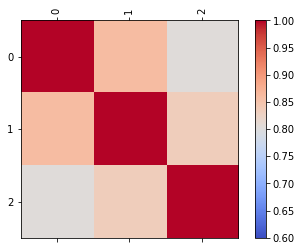

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(critaria_cor,cmap='coolwarm', vmin=0.6, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(critaria_cor.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(critaria_cor.columns)
ax.set_yticklabels(critaria_cor.columns)
plt.show()  

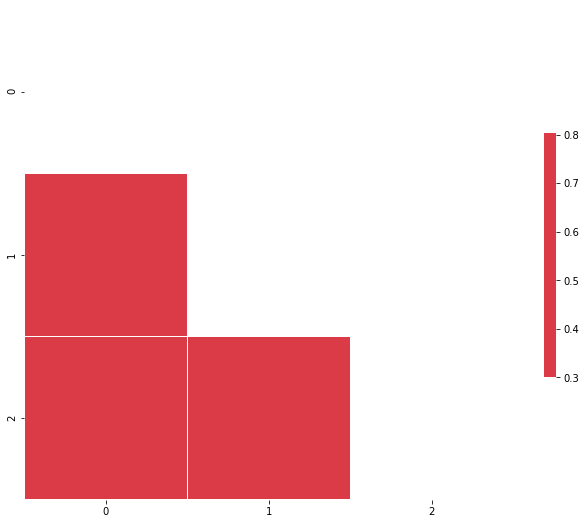

In [71]:
mask = np.zeros_like(critaria_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(critaria_cor, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

# Creating SRMF

In [18]:
SRMF= FZMF_matrix.T.corr()
SRMF.to_excel("correlation_matix.xlsx")
SRMF.head()
 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.905803,0.257544,0.852747,0.625919,-0.165868,0.924936,0.906753,0.957616,0.184586,0.271104,0.201286,-0.365501
1,0.905803,1.000000,0.291706,0.943321,0.743483,0.132729,0.918905,0.828369,0.848098,0.354082,0.253161,0.120930,-0.192044
2,0.257544,0.291706,1.000000,0.428274,0.573974,0.461319,0.468129,0.572392,0.312598,0.540689,0.972149,0.495899,-0.120349
3,0.852747,0.943321,0.428274,1.000000,0.859356,0.343751,0.928210,0.818606,0.846080,0.514451,0.416787,-0.040234,-0.376597
4,0.625919,0.743483,0.573974,0.859356,1.000000,0.599891,0.778657,0.724763,0.746439,0.778521,0.493553,0.049140,-0.292479


In [19]:
Boolian_filter_positive_1= SRMF>= 0.8 
Boolian_filter_positive_2= SRMF< 1 
Boolian_filter_positive=Boolian_filter_positive_1 & Boolian_filter_positive_2
Boolian_filter_positive.head()
SRMF[Boolian_filter_positive]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,0.905803,NaN,0.852747,NaN,NaN,0.924936,0.906753,0.957616,NaN,NaN,NaN,NaN
1,0.905803,NaN,NaN,0.943321,NaN,NaN,0.918905,0.828369,0.848098,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972149,NaN,NaN
3,0.852747,0.943321,NaN,NaN,0.859356,NaN,0.928210,0.818606,0.846080,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.859356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.924936,0.918905,NaN,0.928210,NaN,NaN,NaN,0.934486,0.901799,NaN,NaN,NaN,NaN
7,0.906753,0.828369,NaN,0.818606,NaN,NaN,0.934486,NaN,0.888574,NaN,NaN,NaN,NaN
8,0.957616,0.848098,NaN,0.846080,NaN,NaN,0.901799,0.888574,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
Boolian_filter_negative=SRMF<= -0.2
Boolian_filter_negative.head()
SRMF[Boolian_filter_negative]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.365501
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.376597
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.292479
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.28947,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.266727
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.475979
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.382290


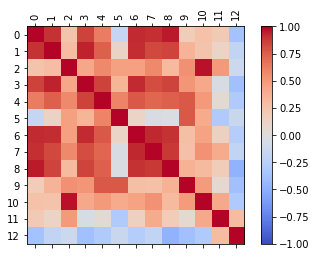

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(SRMF,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(FZMF_matrix.T.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(FZMF_matrix.T.columns)
ax.set_yticklabels(FZMF_matrix.T.columns)
plt.show()  

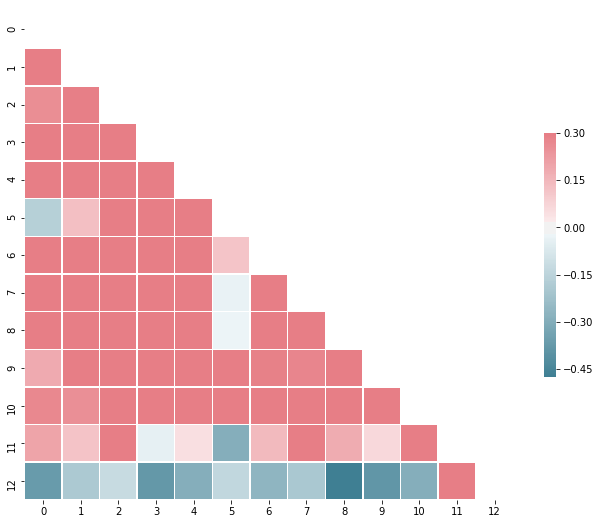

In [22]:
mask = np.zeros_like(SRMF, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(SRMF, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Applying Z-moora to rank different alternatives (Failure modes)

# Normalized Fuzzy decision matrix Converted directly from IMF (Fuzzy_decision_matrix)

In [23]:
normalized=dataset**2
normalized.head()
sum=np.array(normalized.sum(axis=0))
sqrt=np.sqrt(sum)
 

In [24]:
matrix=[]
for i in range(9):
    matrix.append(dataset.iloc[:,i]/sqrt[i])
nomal=pd.DataFrame(matrix).T
nomal.head()

    

    

,0,1,2,3,4,5,6,7,8
0,0.302207,0.038718,0.285314,0.330294,0.099302,0.320222,0.326306,0.300218,0.27735
1,0.190111,0.038718,0.218182,0.207809,0.099293,0.222548,0.205289,0.269127,0.27735
2,0.337119,0.364723,0.285314,0.330340,0.421996,0.127170,0.326335,0.300218,0.27735
3,0.190111,0.033958,0.318807,0.207809,0.099302,0.127170,0.205289,0.300218,0.27735
4,0.231067,0.239556,0.318275,0.200201,0.099288,0.127170,0.197774,0.269127,0.27735


# Applying Z-ratio method

In [25]:
output=nomal.sum(axis=1)
op=output.sort_values(ascending=False)
op.index


Int64Index([10, 7, 2, 11, 12, 8, 0, 9, 6, 5, 4, 3, 1], dtype='int64')

# Applying Z-reference method

In [26]:
reference_vector=nomal.max(axis=0)
print(reference_vector)

0    0.337683
1    0.406893
2    0.318807
3    0.369118
4    0.470788
5    0.540473
6    0.364643
7    0.300218
8    0.277350
dtype: float64


In [27]:
 
z_ref=[] 
for i in range(13):
    sum=0
    z_ref_rows=[]
    for j in range(9):
        sum=sum+pow((nomal.iloc[i,j]-reference_vector[j]),2)
    z_ref_rows.append(pow(sum/9,0.5))
    z_ref.append(z_ref_rows)
     
reference_output=pd.DataFrame(z_ref)
print(reference_output)


#sorting on the basis of deviation to set ranking
#least deviation will be located on the first priority


           0
0   0.190736
1   0.225813
2   0.141056
3   0.240623
4   0.212275
5   0.198962
6   0.189310
7   0.080664
8   0.169185
9   0.192155
10  0.106902
11  0.112402
12  0.128318


In [28]:
#ranking
ref=reference_output.sort_values(by=[0],ascending=True)
ref.head()

,0
7,0.080664
10,0.106902
11,0.112402
12,0.128318
2,0.141056


# Applying Z-muliplicative form

In [29]:
 
z_mult=[] 
for i in range(13):
    mult=1
    z_mult_rows=[]
    for j in range(9):
        mult=mult*nomal.iloc[i,j]
    z_mult_rows.append(mult)
    z_mult.append(z_mult_rows)
     
mult_output=pd.DataFrame(z_mult)
print(mult_output)


#sorting on the basis of deviation to set ranking
#least deviation will be located on the first priority

               0
0   9.526687e-07
1   1.130050e-07
2   1.689867e-05
3   9.232286e-08
4   6.574344e-07
5   6.183894e-07
6   1.346672e-06
7   3.212208e-05
8   3.695248e-06
9   1.675231e-06
10  4.610910e-05
11  1.502283e-05
12  3.931047e-06


In [30]:

multi=mult_output.sort_values(by=[0],ascending=False)
multi.head()

,0
10,0.000046
7,0.000032
2,0.000017
11,0.000015
12,0.000004


In [31]:
z ={'Z-Ratio':op.index,'Z-Reference':ref.index,'Z-Full multiplicative form':multi.index}
z_moora=pd.DataFrame(z)
z_moora.to_excel("z-moora.xlsx")
print(z_moora)
 

    Z-Full multiplicative form  Z-Ratio  Z-Reference
0                           10       10            7
1                            7        7           10
2                            2        2           11
3                           11       11           12
4                           12       12            2
5                            8        8            8
6                            9        0            6
7                            6        9            0
8                            0        6            9
9                            4        5            5
10                           5        4            4
11                           1        3            1
12                           3        1            3


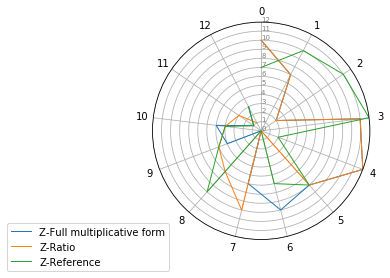

In [32]:
N=len(z_moora)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable) 
angles = [n / float(N) * 2 * pi for n in range(N)]
 

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles, [0,1,2,3,4,5,6,7,8,9,10,11,12])
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ["0","1","2","3","4","5","6","7","8","9","10","11","12"], color="gray", size=7)
plt.ylim(0,12)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values1=z_moora["Z-Full multiplicative form"].values.flatten().tolist()
ax.plot(angles, values1, linewidth=1, linestyle='solid', label="Z-Full multiplicative form")
ax.fill(angles, values1, 'b', alpha=0)
 
# Ind2
values2=z_moora["Z-Ratio"].values.flatten().tolist()
ax.plot(angles, values2, linewidth=1, linestyle='solid', label="Z-Ratio")
ax.fill(angles, values2, 'b', alpha=0)

#Ind3
values3=z_moora["Z-Reference"].values.flatten().tolist()
ax.plot(angles, values3, linewidth=1, linestyle='solid', label="Z-Reference")
ax.fill(angles, values3, 'b', alpha=0)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Modified Z-MOORA

In [33]:
# MAKING MATRIX OF 13*3
mod=[]
mod.append(dataset.iloc[:,0:3].max(axis=1))
mod.append(dataset.iloc[:,3:6].max(axis=1))
mod.append(dataset.iloc[:,3:9].max(axis=1))
modified=pd.DataFrame(mod).T
print(modified)
 

           0         1         2
0   8.500774  8.499583  9.482805
1   6.500592  5.347622  8.500774
2   9.482805  8.500774  9.482805
3   9.498668  5.347622  9.482805
4   9.482805  5.151855  8.500774
5   9.482805  6.500592  8.500774
6   8.500774  6.500592  8.500774
7   9.482805  8.500774  9.482805
8   9.482805  8.499889  8.500774
9   9.482805  6.499681  8.500774
10  9.498668  9.498668  9.498668
11  9.498668  9.498668  9.498668
12  9.498668  8.500774  8.500774


In [34]:
#formation of N matrix
reference_vec=modified.max(axis=0)
print(reference_vec)

0    9.498668
1    9.498668
2    9.498668
dtype: float64


In [35]:
z_re=[] 
for i in range(13):
    
    z_ref_row=[]
    for j in range(3):
        sum=pow((dataset.iloc[i,j]-reference_vec[j]),2)
        z_ref_row.append(pow(sum,0.5))
    z_re.append(z_ref_row)
     
reference_out=pd.DataFrame(z_re)
print(reference_out)


           0         1         2
0   0.997895  8.596327  0.997895
1   4.151046  8.596327  2.998077
2   0.015864  0.998668  0.997895
3   4.151046  8.707275  0.000000
4   2.998987  3.915721  0.015864
5   5.998528  0.999085  0.015864
6   0.997895  7.498486  0.997895
7   0.015864  2.998077  0.997895
8   0.998779  5.998350  0.015864
9   5.998528  0.015864  0.015864
10  0.000000  0.997895  0.000000
11  0.000000  0.997895  5.998350
12  0.000000  0.997895  7.498486


In [36]:
#Formation of M matrix
M_df=pd.DataFrame()

M_df[0]=modified[1]*modified[2]
M_df[1]=modified[0]*modified[2]
M_df[2]=modified[0]*modified[1]

M_matrix=pow(M_df,-1)
M_matrix.head()




,0,1,2
0,0.012407,0.012405,0.013840
1,0.021998,0.018096,0.028766
2,0.012405,0.011121,0.012405
3,0.019720,0.011102,0.019687
4,0.022834,0.012405,0.020469


In [37]:
# formation of expected utility matrix
expected_utility=pd.DataFrame()
expected_utility[0]=M_matrix[0].div(reference_out[2])
expected_utility[1]=M_matrix[1].div(reference_out[1])
expected_utility[2]=M_matrix[2].div(reference_out[0])

print(expected_utility.mean(axis=1).sort_values(ascending=False))

12         inf
11         inf
10         inf
3          inf
9     0.641850
4     0.483113
5     0.385278
8     0.295630
2     0.268513
7     0.266038
6     0.012705
0     0.009249
1     0.005457
dtype: float64


# Plotting a radar plot

[10L, 7L, 2L, 11L, 12L, 8L, 9L, 6L, 0L, 4L, 5L, 1L, 3L]


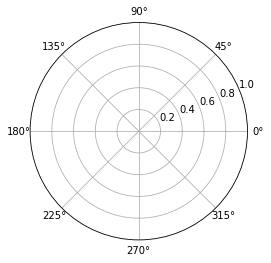

In [38]:
ax=plt.subplot(111,polar=True)
values=z_moora["Z-Full multiplicative form"].values.flatten().tolist()
print(values)

In [39]:
print(z_moora.index)

RangeIndex(start=0, stop=13, step=1)


In [40]:
print(angles)

[0.0, 0.48332194670612205, 0.9666438934122441, 1.4499658401183662, 1.9332877868244882, 2.4166097335306103, 2.8999316802367323, 3.383253626942854, 3.8665755736489764, 4.349897520355098, 4.8332194670612205, 5.316541413767342, 5.799863360473465]


In [41]:
print(z_moora["Z-Full multiplicative form"].values.flatten().tolist())

[10L, 7L, 2L, 11L, 12L, 8L, 9L, 6L, 0L, 4L, 5L, 1L, 3L]


# Creating Node diagram

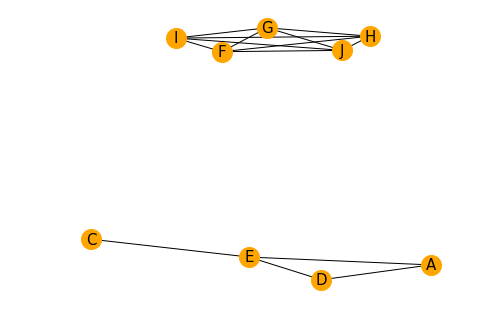

In [42]:

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df = pd.DataFrame({ 'A':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
df
 
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
corr
 
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
links_filtered
 
# Build your graph
G= nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)


In [43]:
import networkx as nx

# Z-moora by using weights

creating a local weight vector of each critaria 

In [44]:
influence_matrix=pd.read_csv("Influence matrix_ling_conversion.csv")
influence_matrix.head()

,FCM MATRIX WITH LINGUISTIC VALUES INFLUENCE (E),Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,S,O,D
1,S,"0,0,0","0.2,0.3.0.4","0.2,0.3.0.4"
2,O,"0,0,0","0,0,0","0,0,0"
3,D,"0,0,0","0,0,0","0,0.1,0.2"


Implementing Eiegn value method

In [45]:
s=[0.4,0.6,0.8]
o=[0,0,0]
D=[0,0.1,0.2]

s Criteria has hightest degree. So every other will be normalized with respect to S

In [46]:
S_n=[]
o_n=[]
D_n=[]
for element in range(len(o)):
    S_n.append(s[element]/s[element])
    o_n.append(o[element]/s[element])
    D_n.append(D[element]/s[element])
print(S_n,o_n,D_n)   
eign_vector=pd.DataFrame([S_n,o_n,D_n])
critaria_cor.head()
eign_vector.head()

([1.0, 1.0, 1.0], [0.0, 0.0, 0.0], [0.0, 0.16666666666666669, 0.25])


,0,1,2
0,1.0,1.000000,1.00
1,0.0,0.000000,0.00
2,0.0,0.166667,0.25


In [47]:
 
weight=[]
for i in range(3):
     weight.append(pd.Series(np.matmul(critaria_cor,eign_vector.iloc[:,i] )))
weight_Vector=pd.DataFrame(weight)
weight_Vector.head()

,0,1,2
0,1.000000,0.860632,0.803861
1,1.133977,0.999909,0.970528
2,1.200965,1.069548,1.053861


Normalizing_global_weights

In [48]:
print(weight_Vector.mean(axis=1))

0    0.888164
1    1.034805
2    1.108125
dtype: float64


In [49]:
print(weight_Vector.mean(axis=1).max())

1.10812462517


In [50]:
weight_S_n=np.divide(weight_Vector.iloc[0,:],weight_Vector.iloc[2,:]) 
weight_o_n=np.divide(weight_Vector.iloc[1,:],weight_Vector.iloc[2,:])
weight_D_n=np.divide(weight_Vector.iloc[2,:],weight_Vector.iloc[2,:])
weights=pd.DataFrame([weight_S_n,weight_o_n,weight_D_n])
weights.head()

,0,1,2
0,0.832664,0.804669,0.762777
1,0.944221,0.934890,0.920926
2,1.000000,1.000000,1.000000


Converting them into crsip_values

In [51]:
b=weights.mean(axis=1).sum()
finalweight=[]
finalweight.append(weights.mean(axis=1)/b)
weightage=pd.DataFrame(finalweight)
print(weightage)


          0         1         2
0  0.292691  0.341462  0.365847


Implementation of Z-Moora using weights gained from FCM

Applying Z-ratio method

nomal is the normalized matrix; it will be multiplied by their corresponding weighage of corresponding critaria

In [52]:
#weighted_normalized=pd.DataFrame()
S_NORMALIZED=nomal.iloc[:,:3]*0.292691
O_NORMALIZED=nomal.iloc[:,3:6]*0.341462 
D_NORMALIZED =nomal.iloc[:,6:9]*0.365847
op1=S_NORMALIZED.join(O_NORMALIZED)
changed=op1.join(D_NORMALIZED)
changed.head()
#weighted_normalized=pd.(S_NORMALIZED,O_NORMALIZED,D_NORMALIZED, how='inner')

,0,1,2,3,4,5,6,7,8
0,0.088453,0.011332,0.083509,0.112783,0.033908,0.109344,0.119378,0.109834,0.101468
1,0.055644,0.011332,0.063860,0.070959,0.033905,0.075992,0.075104,0.098459,0.101468
2,0.098672,0.106751,0.083509,0.112799,0.144095,0.043424,0.119389,0.109834,0.101468
3,0.055644,0.009939,0.093312,0.070959,0.033908,0.043424,0.075104,0.109834,0.101468
4,0.067631,0.070116,0.093156,0.068361,0.033903,0.043424,0.072355,0.098459,0.101468


Implementating a Z-ratio method

In [53]:
umm=changed.sum(axis=1)
op2=umm.sort_values(ascending=False)
op2.index

Int64Index([10, 7, 2, 11, 12, 8, 0, 9, 6, 5, 4, 3, 1], dtype='int64')

Applying Z-reference

In [54]:
reference_vector_2=changed.max(axis=0)
print(reference_vector_2)

0    0.098837
1    0.119094
2    0.093312
3    0.126040
4    0.160756
5    0.184551
6    0.133404
7    0.109834
8    0.101468
dtype: float64


In [55]:
z_ref_1=[] 
for i in range(13):
    sum=0
    z_ref_rows_2=[]
    for j in range(9):
        sum=sum+pow((changed.iloc[i,j]-reference_vector_2[j]),2)
    z_ref_rows_2.append(pow(sum/9,0.5))
    z_ref_1.append(z_ref_rows_2)
     
reference_output_2=pd.DataFrame(z_ref_1)
print(reference_output_2)

           0
0   0.061405
1   0.073624
2   0.048091
3   0.079036
4   0.071929
5   0.067616
6   0.061995
7   0.026483
8   0.055779
9   0.064623
10  0.036419
11  0.036463
12  0.041792


In [56]:
ref1=reference_output_2.sort_values(by=[0],ascending=True)
ref1.head()

,0
7,0.026483
10,0.036419
11,0.036463
12,0.041792
2,0.048091


# Applying Z-multilative form

In [57]:
z_mult_2=[] 
for i in range(13):
    mult=1
    z_mult_rows_2=[]
    for j in range(9):
        mult=mult*changed.iloc[i,j]
    z_mult_rows_2.append(mult)
    z_mult_2.append(z_mult_rows_2)
     
mult_output_2=pd.DataFrame(z_mult_2)
print(mult_output_2)

               0
0   4.656886e-11
1   5.523973e-12
2   8.260496e-10
3   4.512976e-12
4   3.213706e-11
5   3.022844e-11
6   6.582874e-11
7   1.570209e-09
8   1.806331e-10
9   8.188956e-11
10  2.253930e-09
11  7.343541e-10
12  1.921596e-10


In [58]:
multi_2=mult_output_2.sort_values(by=[0],ascending=False)
multi_2.head()

,0
10,2.253930e-09
7,1.570209e-09
2,8.260496e-10
11,7.343541e-10
12,1.921596e-10


In [63]:
z1 ={'Z-Ratio':op2.index,'Z-Reference':ref1.index,'Z-Full multiplicative form':multi_2.index}
z_moora_1=pd.DataFrame(z1)
z_moora_1.to_excel("z-moora1.xlsx")
print(z_moora_1)

    Z-Full multiplicative form  Z-Ratio  Z-Reference
0                           10       10            7
1                            7        7           10
2                            2        2           11
3                           11       11           12
4                           12       12            2
5                            8        8            8
6                            9        0            0
7                            6        9            6
8                            0        6            9
9                            4        5            5
10                           5        4            4
11                           1        3            1
12                           3        1            3


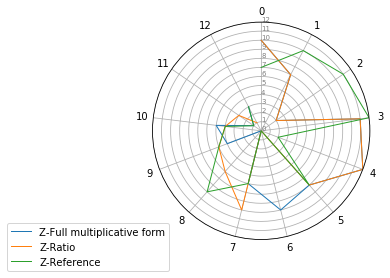

In [78]:
N=len(z_moora_1)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable) 
angles = [n / float(N) * 2 * pi for n in range(N)]
 

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles, [0,1,2,3,4,5,6,7,8,9,10,11,12])
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ["0","1","2","3","4","5","6","7","8","9","10","11","12"], color="gray", size=7)
plt.ylim(0,12)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values1=z_moora_1["Z-Full multiplicative form"].values.flatten().tolist()
ax.plot(angles, values1, linewidth=1, linestyle='solid', label="Z-Full multiplicative form")
ax.fill(angles, values1, 'b', alpha=0)
 
# Ind2
values2=z_moora_1["Z-Ratio"].values.flatten().tolist()
ax.plot(angles, values2, linewidth=1, linestyle='solid', label="Z-Ratio")
ax.fill(angles, values2, 'b', alpha=0)

#Ind3
values3=z_moora_1["Z-Reference"].values.flatten().tolist()
ax.plot(angles, values3, linewidth=1, linestyle='solid', label="Z-Reference")
ax.fill(angles, values3, 'b', alpha=0)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))